In [28]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from tnia.plotting.projections import show_xyz_max
import time

input_image = imread("D:\\images\\from broad\\BBBC032_v1_dataset\\BMP4blastocystC3-cropped_resampled_8bit.tif")

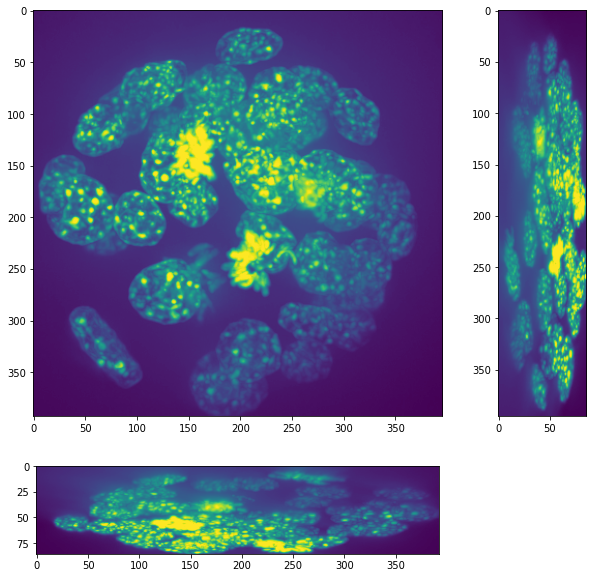

In [29]:
show_xyz_max(input_image)

In [54]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

input_image_gpu = cle.push(input_image)

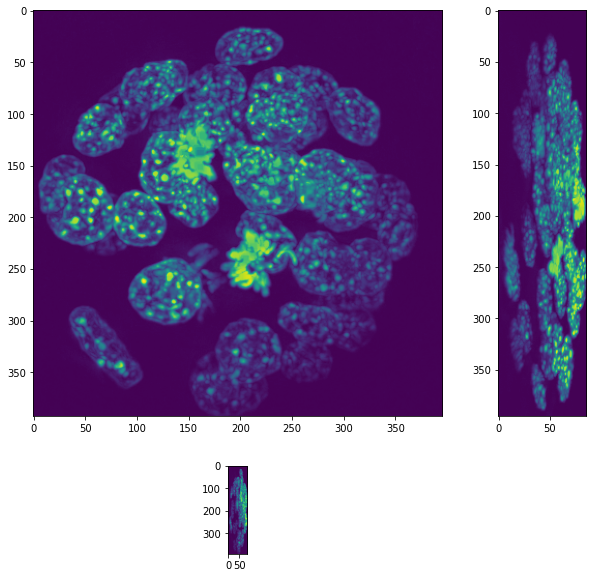

In [74]:
background_subtracted = cle.top_hat_box(input_image, radius_x=2, radius_y=2, radius_z=5)
show_xyz_max(background_subtracted)

0.03050020000000586


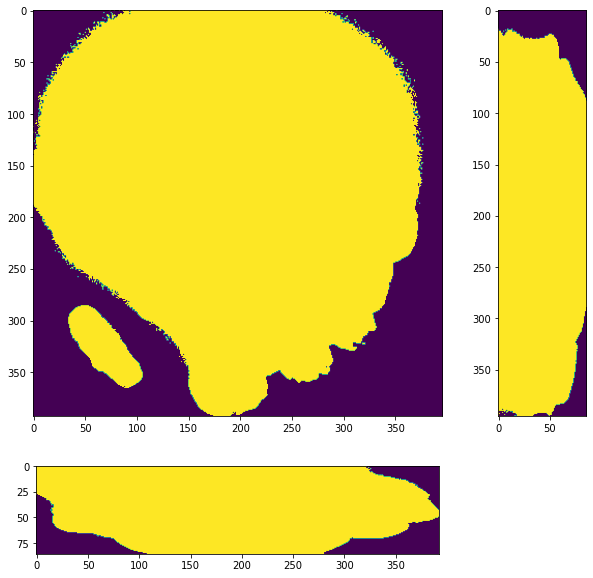

In [36]:


start=time.perf_counter()
binary_gpu = cle.threshold_otsu(input_image_gpu)
end=time.perf_counter()
show_xyz_max(cle.pull(binary_gpu))
print(end-start)

0.09747370000013689


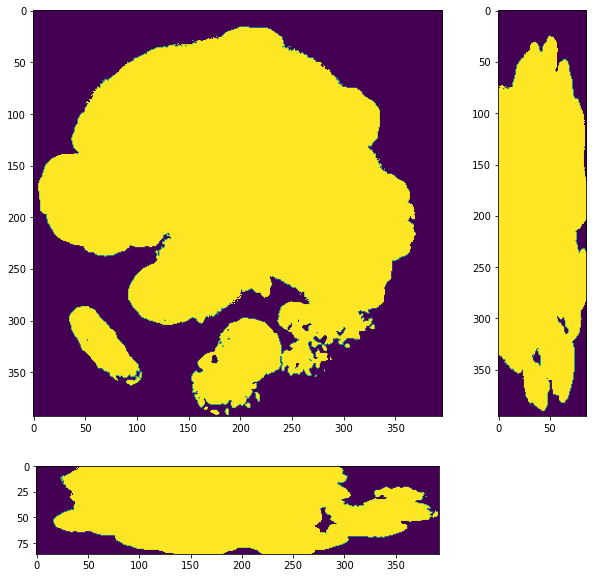

In [37]:
from skimage.filters import threshold_otsu

start=time.perf_counter()
binary = input_image>threshold_otsu(input_image)
end=time.perf_counter()
show_xyz_max(binary)
print(end-start)

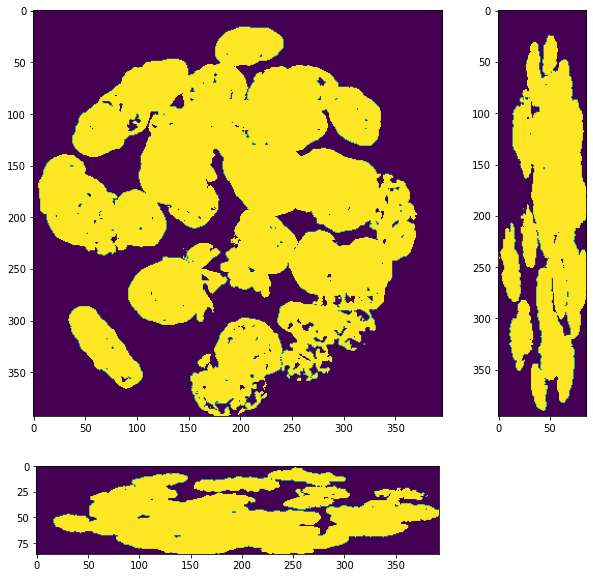

In [66]:
import numpy as np
local_thresholded = np.empty_like(input_image)

current_img = cle.pull(background_subtracted)

global_threshold = 10

# loop through each 
for i in range(input_image.shape[0]):
    temp=current_img[i,:,:]
    local_thresholded[i,:,:]=np.logical_and(temp>threshold_local(temp, 101), temp>global_threshold)
    
show_xyz_max(local_thresholded)

In [67]:
from skimage.morphology import label
labeled = label(local_thresholded)

In [68]:
type(cle.local_threshold)

function

In [17]:
help(cle.local_threshold)

Help on function greater in module pyclesperanto_prototype._tier1._greater:

greater(source1: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], source2: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None)
    Determines if two images A and B greater pixel wise.
    
    f(a, b) = 1 if a > b; 0 otherwise. 
    
    Parameters
    ----------
    source1 : Image
    source2 : Image
    destination : Image
    
    Returns
    -------
    destination
    
    Examples
    --------
    >>> import pyclesperanto_prototype as cle
    >>> cle.greater(source1, source2, destination)
    
    References
    ----------
    .. [1] https://clij.github.io/clij2-docs/reference_gr

In [72]:
# start napari
import napari
viewer = napari.Viewer()

# show images
viewer.add_image(input_image, scale = [3,1,1])
viewer.add_labels(labeled, scale = [3,1,1])

<Labels layer 'labeled' at 0x1dfc7931280>

Exception in callback BaseAsyncIOLoop._handle_events(6292, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(6292, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-pac